In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# crazy thing, to show graphs in cells
%matplotlib inline

from matplotlib import pyplot as plt # for data visualisation

In [2]:
# each row is length, width and type (0,1)
data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, 0.5, 1],
        [2,   0.5, 0],
        [5.5, 1,   1],
        [1,   1,   0]]

mystery_data = [4.5, 1]

In [3]:
# set the random seed to keep random values same everytime
np.random.seed(0)

w1 = np.random.randn()
w2 = np.random.randn()
b  = np.random.randn()
w1, w2, b

(1.764052345967664, 0.4001572083672233, 0.9787379841057392)

In [4]:
# sigmoid function
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# derivative of sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

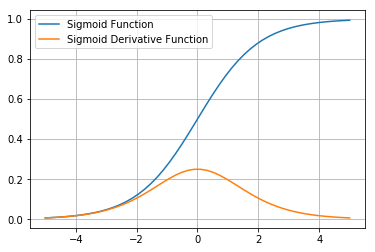

In [5]:
# sigmoid graph for value in between -5 and 5
plt.plot(np.linspace(-5, 5, 50), sigmoid(np.linspace(-5, 5, 50)), label='Sigmoid Function')

# sigmoid derivative graph for value in between -5 and 5
plt.plot(np.linspace(-5, 5, 50), sigmoid_derivative(np.linspace(-5, 5, 50)), label='Sigmoid Derivative Function')

# show grid and legends
plt.grid()
plt.legend()

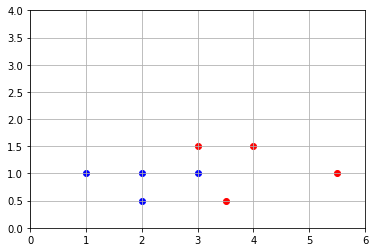

In [6]:
# for grid and axis in plot
plt.grid()
plt.axis([0, 6, 0, 4])

# scatter plot on our data set
for i in range(len(data)):
    point = data[i]
    color = 'r'
    if point[2] == 0:
        color = 'b'
    plt.scatter(point[0], point[1], c=color)

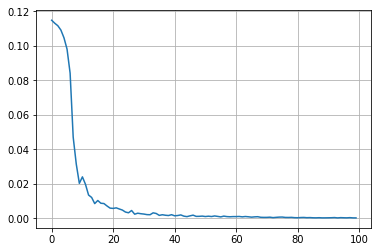

In [7]:
# training loop

# Learning rate for our neural network
learning_rate = 0.03

# Array to keep track of total cost in every 100 iter
total_cost = []

for i in range(10000):
    
    # getting a random data enrty from our dataset  
    point = data[np.random.randint(len(data))]
    
    # predicting a output values using out hyperparameters(w1, w2, b)   
    z = point[0] * w1 + point[1] * w2 + b
    
    # let's squash the predicted value to (0,1) using sigmoid function     
    pred = sigmoid(z)
    
    # target is our orignal output for the given entry
    target = point[2]
    
    # Calculating cost since we have both target and predicted value    
    cost = np.square(pred - target)
    
    # In order to adjust the hyperparameters, calculating derivative of cost w.r.t prediction    
    dcost_dpred = 2 * (pred - target)
    
    # In order to adjust the hyperparameters, calculating derivative of prediction w.r.t z 
    dpred_dz = sigmoid_derivative(z)
    
    # In order to adjust the hyperparameters (w1), calculating derivative of z w.r.t w1
    dz_dw1 = point[0]
    
    # In order to adjust the hyperparameters (w2), calculating derivative of z w.r.t w2
    dz_dw2 = point[1]
    
    # In order to adjust the hyperparameters (b), calculating derivative of z w.r.t b ~= 1
    dz_db = 1
    
    # After calculating derivative cost w.r.t pred && derivative pred w.r.t z,
    # Using chain rule, we can calculate derivative of cost w.r.t z    
    dcost_dz = dcost_dpred * dpred_dz
    
    # Since we know the derivative of cost w.r.t z, again using chain rule,
    # we can calculate derivative of cost w.r.t hyperparameters(w1, w2, b)
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db
    
    # Updating our hyperparamters, using the learning rate and calculated derivative     
    w1 = w1 - (learning_rate * dcost_dw1)
    w2 = w2 - (learning_rate * dcost_dw2)
    b = b - (learning_rate * dcost_db)
    
    # This if condition is to track the overall cost of our dataset,
    # using our updated hyperparameters value but once in every 100 iter
    # and append the cost_sum to the total_cost array.
    if i % 100 == 0:
        for j in range(len(data)):
            cost_sum = 0
            h = sigmoid(data[j][0] * w1 + data[j][1] * w2 + b)
            cost_sum += np.square(h - data[j][2])
        total_cost.append(cost_sum/len(data))

# Tarning of our dataset is completed, now lets see whether we have 
# a decreasing graph of cost fucntion.
plt.plot(total_cost)
plt.grid()

In [8]:
# Let's see how accurate our model Is

for i in range(len(data)):
    H = sigmoid(data[i][0] * w1 + data[i][1] * w2 + b)
    print("Expected : %d and Predicted : %d" % (data[i][2], np.round(H)))

Expected : 1 and Predicted : 1
Expected : 0 and Predicted : 0
Expected : 1 and Predicted : 1
Expected : 0 and Predicted : 0
Expected : 1 and Predicted : 1
Expected : 0 and Predicted : 0
Expected : 1 and Predicted : 1
Expected : 0 and Predicted : 0


In [9]:
# let's predict the type for our mysterious data where length is 4.5 and width is 1.0
H = sigmoid(mystery_data[0] * w1 + mystery_data[1] * w2 + b)
if np.round(H) == 0:
    print('Blue Flower')
else:
    print('Red Flower')

Red Flower
